In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import seaborn as sns
sns.set(font_scale=1.2)

In [2]:
A = 4 # helium mass number
Zi = 1 # assuming singly ionized helium i guess?
mp = 1 # this is the only way the units work
Kideal = 8.25e7 * ((1+Zi)/A) * u.erg / (u.g * u.K)
Ke = 3.14e12 * (A*mp/Zi) * u.erg/u.cm**3 * (u.g/u.cm**3)**(-5/3)
Kc = 2.23e12 * Zi**(2/3) * (A*mp/Zi)**(4/3) * u.erg/u.cm**3 * (u.g/u.cm**3)**(-4/3)

In [3]:
def radius(M, T=1e4*u.K):
    term1 = const.G*M
    term2 = Kc * M**(1/3)
    term3_a = (term1 + term2)**2
    term3_b = 4*Kideal*Ke*M**(2/3)*T
    term3 = term3_a - term3_b
    r = (term1 + term2 - np.sqrt(term3))/(2*Kideal*T)
    return r.to(u.solRad)

In [4]:
M = np.logspace(-5,0,1000)*u.solMass
R = radius(M)
R2 = radius(M, T=1e5*u.K)

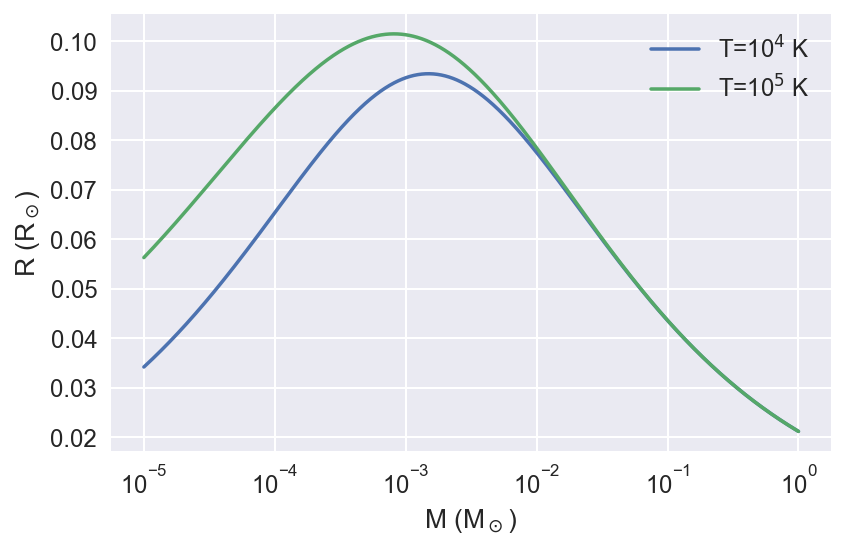

In [5]:
plt.semilogx(M, R, label='T=10$^4$ K')
plt.semilogx(M, R2, label='T=10$^5$ K')
plt.legend()
plt.xlabel('M (M$_\odot$)')
plt.ylabel('R (R$_\odot$)')
plt.gcf().tight_layout()
plt.savefig('mass_radius.jpg', dpi=150)